# Bangla Digit Classification
Dataset provided by MD. Arif

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data.csv")
df.head()

,Label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,8,251,252,1,247,249,254,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,2,255,255,255,255,255,255,255,255,255,...,255,252,254,255,254,6,0,239,253,255
2,9,255,255,255,255,254,255,250,253,253,...,255,255,255,255,255,255,255,255,255,255
3,0,255,254,255,255,255,255,254,254,254,...,31,244,255,255,255,251,254,254,254,255
4,0,255,255,255,255,255,254,254,254,255,...,254,253,254,253,253,254,254,254,255,255


1. Create features and target array.
2. Scale features array.
3. Split dataset in training and test set with ratio of 0.3

In [3]:
X = df.drop("Label", axis=1).values
y = df["Label"].values

## I'm using two kind of scaling
* sklearn.preprocessing.StandardScaler (using variable std_X)
* Simply dividing all values by 255. This will make the range of data [0,1]

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_X = sc.fit_transform(X)
std_X

array([[ -0.11464388,  -0.02393645, -12.80894999, ...,   0.40316392,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.19812513,
          0.37104972,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486],
       ...,
       [ -0.05632127,  -0.02393645,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.37753408,
          0.39639535,   0.33062486],
       [  0.11864656,   0.12658178,   0.13324576, ...,   0.40316392,
          0.39639535,   0.33062486]])

In [5]:
from sklearn.preprocessing import MinMaxScaler
mnmxSc = MinMaxScaler()
X = mnmxSc.fit_transform(X)
X.min(), X.max()

(0.0, 1.0)

## Spliting the dataset using train_test_split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
std_X_train, std_X_test, std_y_train, std_y_test = train_test_split(std_X, y, test_size=0.3, random_state=42)

# Stochastic Gradient Descent


In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf_1 = SGDClassifier(random_state=42)
sgd_clf_2 = SGDClassifier(random_state=42)

sgd_clf_1.fit(X_train, y_train)
sgd_clf_2.fit(std_X_train, std_y_train)

y_pred = sgd_clf_1.predict(X_test)
std_y_pred = sgd_clf_1.predict(std_X_test)

n_correct = sum(y_pred == y_test)
std_n_correct = sum(std_y_pred == std_y_test)

print(n_correct, std_n_correct)
print("\n")
print(n_correct/len(y_pred), std_n_correct/len(std_y_pred))

C:\Users\User\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


3897 3152


0.8316261203585147 0.6726419120785317


In [9]:
sgd_clf_dummy = SGDClassifier(max_iter= 5000, random_state=42)
sgd_clf_dummy.fit(std_X_train, std_y_train)

SGDClassifier(max_iter=5000, random_state=42)

In [10]:
sgd_clf_dummy.score(std_X_test, std_y_test)

0.8444302176696543

In [11]:
SGDClassifier(max_iter= 5000, alpha=0.1, random_state=42).fit(std_X_train, std_y_train).score(std_X_test, std_y_test)

0.8489116517285531

# Perform Grid Search on SGDClassifier

In [7]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = [
    {'max_iter': [2000, 5000, 10000],
    'alpha': [ 0.0001, 0.01, 1.0, 10, 100]
    }
]

grid_search = GridSearchCV(SGDClassifier(), param_grid, cv=5, scoring="accuracy", return_train_score=True)

In [16]:
grid_search.fit(std_X, y)

GridSearchCV(cv=5, estimator=SGDClassifier(),
             param_grid=[{'alpha': [0.0001, 0.01, 1.0, 10, 100],
                          'max_iter': [2000, 5000, 10000]}],
             return_train_score=True, scoring='accuracy')

In [17]:
grid_search.best_estimator_, grid_search.best_score_ 

(SGDClassifier(alpha=0.01, max_iter=2000), 0.8486555697823304)

In [21]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,50.671915,2.690581,0.003804,4.004004e-04,0.0001,2000,"{'alpha': 0.0001, 'max_iter': 2000}",0.842830,0.848592,0.855314,...,0.842958,0.008471,4,0.891325,0.891085,0.887084,0.890685,0.892846,0.890605,0.001907
1,50.142036,1.507003,0.003804,4.002096e-04,0.0001,5000,"{'alpha': 0.0001, 'max_iter': 5000}",0.842190,0.847311,0.854994,...,0.842446,0.008195,5,0.891485,0.890125,0.887404,0.891165,0.893406,0.890717,0.001967
2,51.846342,1.931006,0.003804,4.001617e-04,0.0001,10000,"{'alpha': 0.0001, 'max_iter': 10000}",0.842190,0.847631,0.854673,...,0.842254,0.008390,6,0.892125,0.889725,0.887324,0.891245,0.892686,0.890621,0.001928
3,3.779764,0.190630,0.004004,9.536743e-08,0.01,2000,"{'alpha': 0.01, 'max_iter': 2000}",0.844750,0.852753,0.864917,...,0.848656,0.010350,1,0.864997,0.860435,0.858435,0.860595,0.864757,0.861844,0.002592
4,3.620546,0.219875,0.004004,1.784161e-07,0.01,5000,"{'alpha': 0.01, 'max_iter': 5000}",0.843470,0.851793,0.863636,...,0.847823,0.010364,2,0.864197,0.859235,0.858595,0.862756,0.866677,0.862292,0.003036
5,3.932798,0.212396,0.004203,4.002333e-04,0.01,10000,"{'alpha': 0.01, 'max_iter': 10000}",0.842510,0.852753,0.861396,...,0.847055,0.009777,3,0.865077,0.860115,0.857794,0.860355,0.865077,0.861684,0.002911
6,0.740235,0.005658,0.004403,4.903491e-04,1.0,2000,"{'alpha': 1.0, 'max_iter': 2000}",0.828745,0.838028,0.845070,...,0.834507,0.010520,9,0.843550,0.841069,0.838348,0.843070,0.841149,0.841437,0.001838
7,0.721290,0.012196,0.004422,4.759820e-04,1.0,5000,"{'alpha': 1.0, 'max_iter': 5000}",0.828425,0.839309,0.849872,...,0.836364,0.009438,7,0.839229,0.844670,0.842350,0.841869,0.847311,0.843086,0.002730
8,0.737113,0.026265,0.004004,1.784161e-07,1.0,10000,"{'alpha': 1.0, 'max_iter': 10000}",0.833227,0.838348,0.844110,...,0.835147,0.010426,8,0.841229,0.845711,0.839069,0.841469,0.839949,0.841485,0.002286
9,1.849442,0.836899,0.003203,1.601553e-03,10,2000,"{'alpha': 10, 'max_iter': 2000}",0.524968,0.481114,0.691101,...,0.552177,0.101800,11,0.532410,0.492958,0.675496,0.417734,0.656370,0.554994,0.097976


# Findings from Grid Search
max_iter doesn't change the accuracy that much. But higher alpha value decreases the accuracy. 

In [25]:
sgd_clf_3 = SGDClassifier(max_iter=2000, alpha=0.01, random_state=42)
sgd_clf_4 = SGDClassifier(max_iter=2000, alpha=0.01, random_state=42)

sgd_clf_3.fit(X_train, y_train)
sgd_clf_4.fit(std_X_train, std_y_train)

y_pred = sgd_clf_3.predict(X_test)
std_y_pred = sgd_clf_4.predict(std_X_test)

sum(y_pred == y_test), sum(std_y_pred == y_test)

(4011, 3993)

In [31]:
print(sgd_clf_3.score(X_test, y_test))
print(sgd_clf_4.score(std_X_test, std_y_test))

0.8559539052496798
0.852112676056338


## Confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix

In [26]:
con_mx = confusion_matrix(y_test, y_pred) # predictions are from sgd_clf_1
con_mx

array([[440,   3,   9,   9,   2,   5,  12,   7,   6,   6],
       [  2, 396,   6,   3,   0,   7,  10,   7,   8,  26],
       [  2,   0, 427,   0,  10,   8,  10,   7,  11,   7],
       [  5,   2,   7, 402,   0,   5,  49,   5,   6,   9],
       [  3,   0,   4,   1, 386,   8,  10,   3,   4,   1],
       [  3,   0,  10,   2,   8, 381,  56,   8,   7,   5],
       [  1,   1,   2,  24,   0,  10, 397,   6,   4,  11],
       [  0,   0,  10,   2,   0,  11,   4, 400,   3,   6],
       [  1,   1,  11,   2,   1,   4,  16,   2, 429,   3],
       [  0,  40,  17,   8,   6,   2,  36,   7,  19, 353]], dtype=int64)

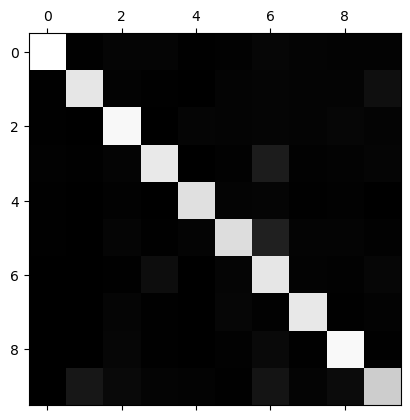

In [27]:
plt.matshow(con_mx, cmap=plt.cm.gray)

### 5,6 and 3,6 are more error-prone 

## Precision and Recall

In [28]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred,average=None)
recall = recall_score(y_test, y_pred,average=None)

print(precision, recall)

[0.96280088 0.89390519 0.84890656 0.88741722 0.9346247  0.86394558
 0.66166667 0.88495575 0.86317907 0.82669789] [0.88176353 0.8516129  0.88589212 0.82040816 0.91904762 0.79375
 0.87061404 0.91743119 0.91276596 0.72336066]


### 6 has very low precision
How can we increase it's precision?

# K Nearest Neighbors (KNN)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

knn_n_correct = sum(knn_y_pred == y_test)
print("Number of correct predictions:", knn_n_correct)
print("Accuracy:", knn_n_correct/len(y_pred))

Number of correct predictions: 4124
Accuracy: 0.8800682885189928


In [34]:
KNeighborsClassifier(n_neighbors=5).fit(std_X_train, std_y_train).score(std_X_test, std_y_test)

0.8655569782330346

In [36]:
param_grid = [
    {
    'n_neighbors': [ 3,5,10]
    }
]

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring="accuracy", return_train_score=True)
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 5, 10]}], return_train_score=True,
             scoring='accuracy')

In [37]:
grid_search.best_estimator_, grid_search.best_score_ 

(KNeighborsClassifier(), 0.879449423815621)

In [38]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.030828,0.001602,0.343797,0.032063,3,{'n_neighbors': 3},0.869398,0.882202,0.889565,0.881242,...,0.878233,0.008013,2,0.934619,0.931178,0.929257,0.932298,0.933179,0.932106,0.001815
1,0.032029,0.002532,0.355416,0.018992,5,{'n_neighbors': 5},0.873560,0.886364,0.891485,0.877401,...,0.879449,0.008400,1,0.919734,0.919574,0.918134,0.922375,0.921735,0.920310,0.001543
2,0.031758,0.001280,0.347969,0.014621,10,{'n_neighbors': 10},0.868758,0.879962,0.884763,0.869078,...,0.872151,0.009336,3,0.901889,0.898848,0.897887,0.900368,0.901649,0.900128,0.001558


In [39]:
con_mx_knn = confusion_matrix(y_test, knn_y_pred) # predictions are from knn_clf
con_mx_knn

array([[480,   6,   1,   3,   2,   3,   1,   2,   0,   1],
       [ 11, 433,   6,   1,   1,   0,   3,   0,   1,   9],
       [  1,  13, 454,   1,   5,   1,   2,   4,   1,   0],
       [ 17,   6,   0, 440,   2,   2,  21,   1,   1,   0],
       [ 11,   0,   5,   1, 388,   2,   3,   5,   4,   1],
       [ 25,   2,   8,   6,   2, 353,  81,   2,   1,   0],
       [  5,   4,   2,  28,   0,  11, 403,   0,   1,   2],
       [  6,   3,   4,   0,   1,   0,   1, 421,   0,   0],
       [ 20,   6,   1,   3,   5,   0,   6,   1, 428,   0],
       [ 28,  93,  10,   4,   3,   3,   5,  15,   3, 324]], dtype=int64)

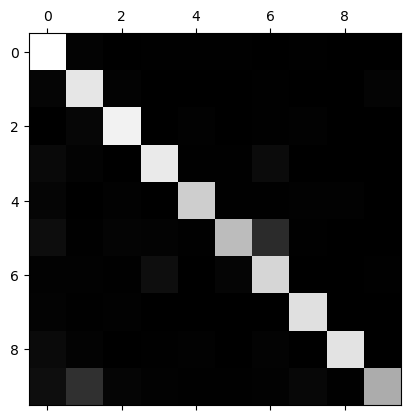

In [40]:
plt.matshow(con_mx_knn, cmap=plt.cm.gray)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

lgr_clf = LogisticRegression(solver = 'liblinear', C=1.0, random_state=42)
lgr_clf.fit(std_X_train, std_y_train)
lgr_y_pred = lgr_clf.predict(std_X_test)

lgr_n_correct = sum(lgr_y_pred == std_y_test)
print("Number of correct predictions:", lgr_n_correct)
print("Accuracy:", lgr_n_correct/len(lgr_y_pred))

Number of correct predictions: 3841
Accuracy: 0.8196756295347845


In [15]:
LogisticRegression(solver = 'liblinear', C=0.01, random_state=42).fit(std_X_train, std_y_train).score(std_X_test, std_y_test)

0.8474178403755869

In [21]:
lgr_clf_2 = LogisticRegression(solver = 'liblinear', C=0.01, random_state=42)
lgr_clf_2.fit(X_train, y_train)
lgr_y_pred_2 = lgr_clf_2.predict(X_test)

In [22]:
con_mx_knn = confusion_matrix(y_test, lgr_y_pred_2) # predictions are from lgr_clf_2
con_mx_knn

array([[442,   2,   9,   8,   8,   3,   4,   8,   5,  10],
       [  2, 403,   7,   0,   1,   4,   6,   8,   7,  27],
       [  7,   2, 412,   0,  15,   9,   2,   8,   9,  18],
       [  6,   2,   7, 409,   1,   6,  33,   7,   6,  13],
       [  3,   0,   3,   2, 389,   5,   4,   4,   6,   4],
       [  5,   2,  10,   5,  14, 384,  32,   9,   9,  10],
       [  1,   3,   3,  37,   1,  14, 365,   9,   5,  18],
       [  0,   0,  10,   2,   1,  11,   2, 396,   3,  11],
       [  2,   1,   6,   3,   6,   3,   4,   4, 427,  14],
       [  4,  52,  15,   5,  11,   0,  17,  11,  18, 355]], dtype=int64)

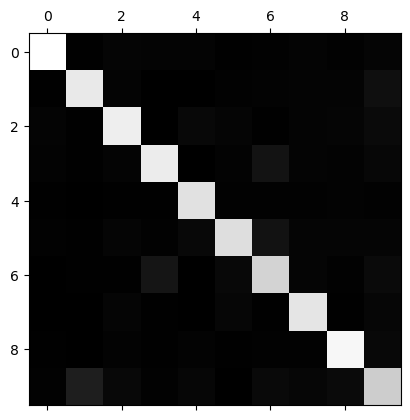

In [23]:
plt.matshow(con_mx_knn, cmap=plt.cm.gray)

# Random Forests

In [29]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=100, n_jobs=-1)
rnd_clf.fit(std_X_train, std_y_train)
rnd_y_pred = rnd_clf.predict(std_X_test)

rnd_n_correct = sum(rnd_y_pred == std_y_test)
print("Number of correct predictions:", rnd_n_correct)
print("Accuracy:", rnd_n_correct/len(rnd_y_pred))

Number of correct predictions: 3998
Accuracy: 0.8531796841655996


# SVM Classifier

In [7]:
from sklearn.svm import SVC

In [9]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

svm_n_correct = sum(svm_y_pred == y_test)
print("Number of correct predictions:", svm_n_correct)
print("Accuracy:", svm_n_correct/len(svm_y_pred))

Number of correct predictions: 4250
Accuracy: 0.9069568928723858


In [ ]:
svm_clf.score(X_test, y_test)

In [26]:
svm_precision = precision_score(y_test, y_pred,average=None)
svm_recall = recall_score(y_test, y_pred,average=None)

print(svm_precision)
print(svm_recall)

[0.90554415 0.84095861 0.82170543 0.84076433 0.92931937 0.8317757
 0.67631103 0.92944039 0.8647541  0.73523422]
[0.88376754 0.83010753 0.87966805 0.80816327 0.8452381  0.74166667
 0.82017544 0.87614679 0.89787234 0.7397541 ]


# Hyperparameter Tuning on SVM Classifier

In [18]:
poly_karnel_svm_clf = SVC(kernel="poly", degree=5, coef0=1, C=1)
poly_karnel_svm_clf.fit(X_train, y_train)
poly_karnel_svm_clf.score(X_test, y_test)

0.9003414425949637

In [33]:
rbf_karnel_svm_clf = SVC(kernel="rbf", gamma=5, C=0.001)
rbf_karnel_svm_clf.fit(X_train, y_train)
rbf_karnel_svm_clf.score(X_test, y_test)

0.08962868117797695

In [ ]:
# LinearSVC

## Searching best hyperparameters using GridSearchCV

In [11]:
from sklearn.model_selection import GridSearchCV
svm_clf_2 = SVC()

param_grid = [
    {'kernel': ["poly"], 'degree': [3], 'coef0': [1,2,3], 'C': [1,3,5,10]}
]

grid_search = GridSearchCV(svm_clf_2, param_grid, cv=5, scoring="accuracy", return_train_score=True)

In [12]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 3, 5, 10], 'coef0': [1, 2, 3], 'degree': [3],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [13]:
grid_search.best_estimator_

SVC(C=1, coef0=1, kernel='poly')

In [16]:
best_svm_clf = SVC(kernel="poly", degree=3, coef0=1, C=1)
best_svm_clf.fit(X_train, y_train)
best_svm_clf.score(X_test, y_test)

0.882202304737516

In [20]:
param_grid_2 = [
    {'kernel': ["poly"], 'degree': [3,5,10], 'coef0': [1], 'C': [1]}
]

grid_search_2 = GridSearchCV(SVC(), param_grid_2, cv=5, scoring="accuracy", return_train_score=True)

In [21]:
grid_search_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'coef0': [1], 'degree': [3, 5, 10],
                          'kernel': ['poly']}],
             return_train_score=True, scoring='accuracy')

In [22]:
grid_search_2.best_estimator_

SVC(C=1, coef0=1, degree=10, kernel='poly')

In [23]:
best_svm_clf_2 = SVC(kernel="poly", degree=10, coef0=1, C=1)
best_svm_clf_2.fit(X_train, y_train)
best_svm_clf_2.score(X_test, y_test)

0.9095177123346138

In [27]:
best_svm_clf_3 = SVC(kernel="poly", degree=10, coef0=1, C=1)
best_svm_clf_3.fit(std_X_train, std_y_train)
best_svm_clf_3.score(std_X_test, std_y_test)

0.912932138284251

In [28]:
SVC(kernel="sigmoid", gamma='auto', coef0=1, C=1).fit(std_X_train, std_y_train).score(std_X_test, std_y_test)

0.7833973538198891